In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.impute import KNNImputer

df = pd.read_csv('2017UTASP20180628.csv',encoding='cp932')

#df = df[df['RESULT']>1]

questions = ['Q4_{}'.format(i) for i in np.arange(1,18,1)]

for i in questions:
    df[i] = df[i].replace(99,np.nan)

df.loc[:,questions] = KNNImputer().fit_transform(df[questions])

df[questions].head()

,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q4_9,Q4_10,Q4_11,Q4_12,Q4_13,Q4_14,Q4_15,Q4_16,Q4_17
0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,4.0
1,3.0,5.0,5.0,1.0,5.0,5.0,4.0,5.0,2.0,1.0,5.0,3.0,5.0,1.0,3.0,1.0,5.0
2,1.0,3.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0
3,5.0,5.0,5.0,1.0,5.0,5.0,2.0,3.0,1.0,1.0,5.0,3.0,5.0,1.0,1.0,1.0,5.0
4,1.0,5.0,2.0,3.0,3.0,2.0,4.0,2.0,1.0,1.0,4.0,2.0,4.0,2.0,3.0,1.0,1.0


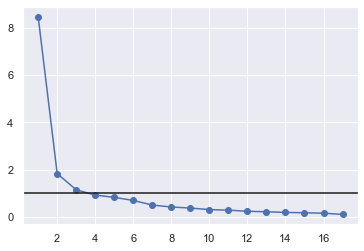

In [3]:
from factor_analyzer import FactorAnalyzer as fa

mod = fa(rotation=None).fit(df[questions])

plt.plot(np.arange(1,18,1),mod.get_eigenvalues()[0],marker='o')
plt.axhline(1,color='k')

In [4]:
res = fa(rotation='promax',n_factors=2).fit(df[questions])

for i in np.arange(1,res.n_factors+1):
    df['factor{}'.format(i)] = res.transform(df[questions].fillna(3))[:,i-1]

df[['factor{}'.format(i) for i in np.arange(1,res.n_factors+1)]].corr()

,factor1,factor2
factor1,1.000000,0.340362
factor2,0.340362,1.000000


Text(0.5, 1.0, 'Japanese 2017 general election candidates by political party and ideological position')

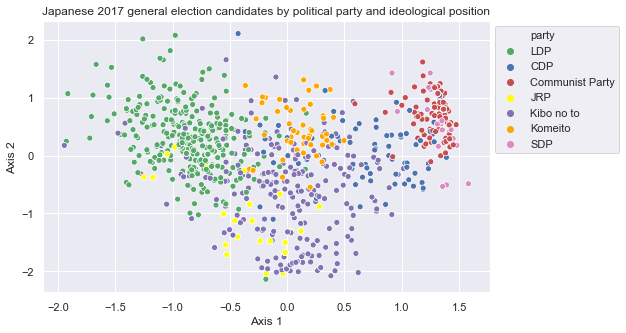

In [5]:
df['party'] = df['PARTY'].replace(np.arange(1,12),['LDP','Komeito','Communist Party','JRP','SDP',np.nan,'Kibo no to','CDP',np.nan,np.nan,np.nan])
plt.figure(figsize=(8,5))
sns.scatterplot(x='factor1',y='factor2',hue='party',data=df,palette=['C2','C0','C3','yellow','C4','orange','C6'])
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.xlabel('Axis 1')
plt.ylabel('Axis 2')
plt.title('Japanese 2017 general election candidates by political party and ideological position')

In [20]:
pd.DataFrame(res.loadings_,columns=['factor1','factor2']).to_excel('loadings_2017_2d.xlsx')

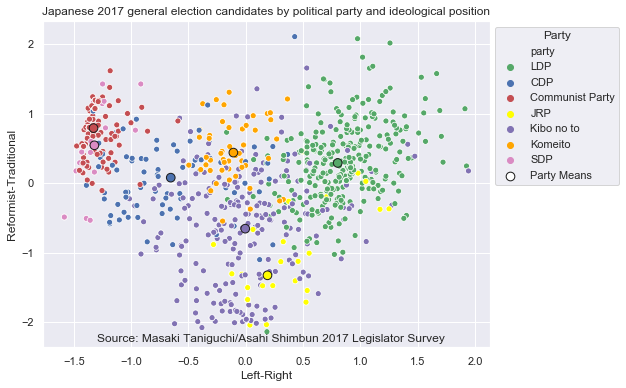

In [6]:
df['factor1'] = -df['factor1']
table = pd.pivot_table(df,index='party',values=['factor1','factor2'])

plt.figure(figsize=(8,6))
sns.scatterplot(x='factor1',y='factor2',hue='party',data=df,palette=['C2','C0','C3','yellow','C4','orange','C6'])
plt.scatter(table['factor1'],table['factor2'],color=['C0','C3','yellow','C4','orange','C2','C6'],edgecolors='k',s=75)
plt.scatter(np.nan,np.nan,color='white',edgecolors='k',s=75,label='Party Means')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Party')
plt.xlabel('Left-Right')
plt.ylabel('Reformist-Traditional')
#plt.axis([-2.15,2.15,-2.15,2.15])
plt.title('Japanese 2017 general election candidates by political party and ideological position')
plt.text(-1.2975,-2.275,'Source: Masaki Taniguchi/Asahi Shimbun 2017 Legislator Survey')
plt.savefig('ge2017_ideology_jpn.png',dpi=200,bbox_inches='tight')

In [27]:
table

,factor1,factor2
party,,
CDP,0.653491,0.078531
Communist Party,1.327545,0.790479
JRP,-0.190301,-1.324302
Kibo no to,0.003631,-0.654508
Komeito,0.107232,0.438409
LDP,-0.803244,0.289587
SDP,1.319935,0.543155
